In [1]:
%load_ext autoreload

In [2]:
import times_series_learning as tsl
import server_profile_learning as spl
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import datetime as dt
import time
from logreader import read_dir
from logparser import parse_all
from loganalyzer import MessageLogAnalyzer, describe, print_description, print_clusters
import class_time_series
import pandas as pd
import numpy as np
import sortedcontainers
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%autoreload 

In [3]:
LogPath = '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/'
p = class_time_series.GetServerData(LogPath)
ServerName = p.ServerList()

In [4]:
ServerName.columns

Index(['qvipnbdora02', 'qvipnbdora04', 'qvipnbusin02', 'qvipnmonlx06',
       'qvipnmonlx10', 'qvipnmonlx14', 'qvipnmonlx16', 'qviqbkarfs02',
       'qviqbocpno12', 'qviqbocpno14', 'qvirbkarfs02', 'qvirbkarno10',
       'qvirbkarno12', 'qvirbkarno14', 'qvirbkarno16', 'qvirbkarno18',
       'qvirbloges02', 'qvirbsapcr02', 'qvircmqsvr02', 'qvirctbems04',
       'qvirnbdora02', 'qvirnbdora04', 'qvirnbusin02', 'qvitbbautin02',
       'qvitbbautin04', 'qvitbbautin06', 'qvitbcjbod02', 'qvitntbems02',
       'qvitsys6'],
      dtype='object')

In [5]:
ServerName.head()

,qvipnbdora02,qvipnbdora04,qvipnbusin02,qvipnmonlx06,qvipnmonlx10,qvipnmonlx14,qvipnmonlx16,qviqbkarfs02,qviqbocpno12,qviqbocpno14,...,qvirctbems04,qvirnbdora02,qvirnbdora04,qvirnbusin02,qvitbbautin02,qvitbbautin04,qvitbbautin06,qvitbcjbod02,qvitntbems02,qvitsys6
2017-09-24,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,0,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,0,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...
2017-09-25,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,0,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...
2017-09-26,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...
2017-09-27,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox

In [6]:
#Select a full week for learning even if not contiguous date
date_available = ServerName[ServerName['qvipnbdora04'] != 0].index
# let 's del the 2017-10-19
#date_available = np.delete(date_available, np.argwhere(date_available == '2017-10-19')[0])
# bug from 19:00 for 284 minutes without logs
print(type(date_available))
# let's take now the first full week
date_ind = np.empty(7,dtype=dt.date)
date_available_2 = np.empty(date_available.shape[0]-7,dtype=dt.date)
for i in range(7):
    d = date_available[int(np.argwhere(date_available.weekday ==i)[0])]
    date_available = np.delete(date_available, np.argwhere(date_available == d)[0])
    date_ind[i]= dt.date.fromtimestamp(d.timestamp())
date_available_2 =[dt.date.fromtimestamp(d.timestamp()) for d in date_available]
print(date_available_2)
print(date_ind)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
[datetime.date(2017, 10, 1), datetime.date(2017, 10, 2), datetime.date(2017, 10, 3), datetime.date(2017, 10, 4), datetime.date(2017, 10, 5), datetime.date(2017, 10, 6), datetime.date(2017, 10, 7), datetime.date(2017, 10, 8), datetime.date(2017, 10, 9), datetime.date(2017, 10, 10), datetime.date(2017, 10, 11), datetime.date(2017, 10, 12), datetime.date(2017, 10, 13), datetime.date(2017, 10, 14), datetime.date(2017, 10, 15), datetime.date(2017, 10, 16), datetime.date(2017, 10, 17), datetime.date(2017, 10, 18), datetime.date(2017, 10, 19), datetime.date(2017, 10, 20), datetime.date(2017, 10, 21), datetime.date(2017, 10, 22), datetime.date(2017, 10, 23), datetime.date(2017, 10, 24), datetime.date(2017, 10, 25), datetime.date(2017, 10, 26)]
[datetime.date(2017, 9, 25) datetime.date(2017, 9, 26)
 datetime.date(2017, 9, 27) datetime.date(2017, 9, 28)
 datetime.date(2017, 9, 29) datetime.date(2017, 9, 30)
 datetime.date(2017, 9, 24)]


In [7]:
log_data_list = ServerName.loc[:,'qvipnbdora04'].values
log_data_list = [i for i in log_data_list if i !=0 ]
log_data_list

['/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170924.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170925.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170926.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170927.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170928.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170929.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170930.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20171001.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20171002.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdo

In [8]:
#Log Clustering

analyzer = MessageLogAnalyzer()

# Import des logs
logs = read_dir('../logs/servers/*qvipnbdora04*')

# Parsing des logs en df
df_log = parse_all(logs)

# Extraction de la partie message
X = df_log.loc[:,2:].values

# Count des fréquences verticales
X_count = analyzer.fit_count(X) # "batch"

# Obtention des labels de clustering
y = analyzer.fit_clusterize(X,X_count)

# Stockage des labels de clustering
df_log['label'] = y

df_log.to_csv('dataframe.csv')

[Success] Logs parsed within 2.14s
[Success] Vocabulary processed within 4.72s
[Success] 447578 Logs reduced into 653 Clusters within 627.91s


In [8]:
df_log = pd.read_csv('dataframe.csv')
df_log.head()

/home/joseph/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,0,1,2,3,4,5,6,7,8,...,61,62,63,64,65,66,67,68,69,label
0,2017-10-20 10:09:06,qvipnbdora04,kernel:,Initializing,cgroup,subsys,cpuset,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Initializing * * *
1,2017-10-20 10:09:06,qvipnbdora04,kernel:,Initializing,cgroup,subsys,cpu,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Initializing * * *
2,2017-10-20 10:09:06,qvipnbdora04,kernel:,Linux,version,339.275.859-307.3.307.el275.x86_64,(mockbuild@x86-029.build.eng.bos.redhat.com),(gcc version 4.4.7 20120313 (Red Hat 4.4.7-9),(GCC),),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* version * * * * * * * * * * * * *
3,2017-10-20 10:09:06,qvipnbdora04,kernel:,Command,line:,ro,rdloaddriver,megaraid_sas,rdloaddriver,qla2xxx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Command line: ro rdloaddriver megaraid_sas rdl...
4,2017-10-20 10:09:06,qvipnbdora04,kernel:,KERNEL,supported,cpus:,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KERNEL supported cpus:


In [9]:
# I have to preprocess the dataframe, put timestamp in index in order to get
# the 3 datasets (1 for profiling, 2nd to set distributionn, 3rd to test)
df_log.index = pd.to_datetime(df_log.timestamp, format='%Y-%m-%d %H:%M:%S')
df_log = df_log.sort_index()

In [10]:
date_profile = [t.isoformat() for t in date_ind]
date_train = [t.isoformat() for t in date_available_2]
date_profile

['2017-09-25',
 '2017-09-26',
 '2017-09-27',
 '2017-09-28',
 '2017-09-29',
 '2017-09-30',
 '2017-09-24']

In [11]:
#resample nous demande une semaine contigu
mask = (df_log.index >= date_profile[6]) & (df_log.index <= date_profile[5])
data_profile = df_log.loc[mask]
data_profile.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,61,62,63,64,65,66,67,68,69,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *


In [12]:
len(data_profile['2017-09-29'])

17974

In [16]:
distribution_init = sortedcontainers.SortedDict(sortedcontainers.SortedList())
for i in range(7):
    distribution_init[i]=sortedcontainers.SortedList([0,np.inf])

In [17]:
# Server Profile Learning (data, parameters, distribution, distribution_period, level_threshold)
%autoreload 
period = 1
m_avg_period = 5
dist_period = 15
dist_radius = 5
parameters = np.asarray([period, m_avg_period, dist_period, dist_radius])
distribution_period = 60*24 # 1 distribution for each day
level_threshold = 1e-2 # For defining outliers
distribution = distribution_init
processus = True

In [18]:
server_profile = spl.ServerProfileLearning(data_profile,parameters, distribution,distribution_period,level_threshold, processus)
server_profile.set_profile()

7
cluster number (oracle) LIST (oracle) of hostname: qvipnbdora04
cluster number (root) * * of hostname: qvipnbdora04
cluster number * * * * * * port * * * of hostname: qvipnbdora04
cluster number * * * * * disk * * * * * * * * of hostname: qvipnbdora04
cluster number * * * * copy * * * * * * * * of hostname: qvipnbdora04
cluster number * * * import * * * * of hostname: qvipnbdora04
cluster number * * * size * * * * of hostname: qvipnbdora04
cluster number * * * table * * * of hostname: qvipnbdora04
cluster number * * - * * * * * * * * * * * * * * * * * * * of hostname: qvipnbdora04
cluster number * * bytes * * * * of hostname: qvipnbdora04
cluster number * * table * * * of hostname: qvipnbdora04
cluster number * 0anacron of hostname: qvipnbdora04
cluster number * CMD * * * * of hostname: qvipnbdora04
cluster number * Disk * * * * * of hostname: qvipnbdora04
cluster number * INFO * * * * * * * * * * * * * * * * * * * * of hostname: qvipnbdora04
cluster number * TTY * PWD * USER * COMMA

In [19]:
server_profile.server_profile.keys()

dict_keys(['qvipnbdora04_general', 'qvipnbdora04_(oracle) LIST (oracle)', 'qvipnbdora04_(root) * *', 'qvipnbdora04_* * * * * * port * * *', 'qvipnbdora04_* * * * * disk * * * * * * * *', 'qvipnbdora04_* * * * copy * * * * * * * *', 'qvipnbdora04_* * * import * * * *', 'qvipnbdora04_* * * size * * * *', 'qvipnbdora04_* * * table * * *', 'qvipnbdora04_* * - * * * * * * * * * * * * * * * * * * *', 'qvipnbdora04_* * bytes * * * *', 'qvipnbdora04_* * table * * *', 'qvipnbdora04_* 0anacron', 'qvipnbdora04_* CMD * * * *', 'qvipnbdora04_* Disk * * * * *', 'qvipnbdora04_* INFO * * * * * * * * * * * * * * * * * * * *', 'qvipnbdora04_* TTY * PWD * USER * COMMAND * * * * * * * * * * *', 'qvipnbdora04_* authentication * logname uid 0 euid 0 tty ssh ruser rhost * user *', 'qvipnbdora04_* message-id *', 'qvipnbdora04_* p3 p8', 'qvipnbdora04_* removed', 'qvipnbdora04_* session * for user * * *', 'qvipnbdora04_* started * * * * *', 'qvipnbdora04_* synchronisator * * * * * *', 'qvipnbdora04_* to * relay

In [20]:
len(server_profile.server_profile.keys())

74

In [21]:
server_profile.server_profile['qvipnbdora04_general'].max_spread

61

In [22]:
server_profile.server_profile['qvipnbdora04_general'].profile.head(30)

,timestamp
2017-09-24 00:00:54,5.0
2017-09-24 00:00:55,8.0
2017-09-24 00:00:56,8.0
2017-09-24 00:00:57,8.0
2017-09-24 00:00:58,8.0
2017-09-24 00:00:59,8.0
2017-09-24 00:01:00,8.0
2017-09-24 00:01:01,14.0
2017-09-24 00:01:02,14.0
2017-09-24 00:01:03,14.0


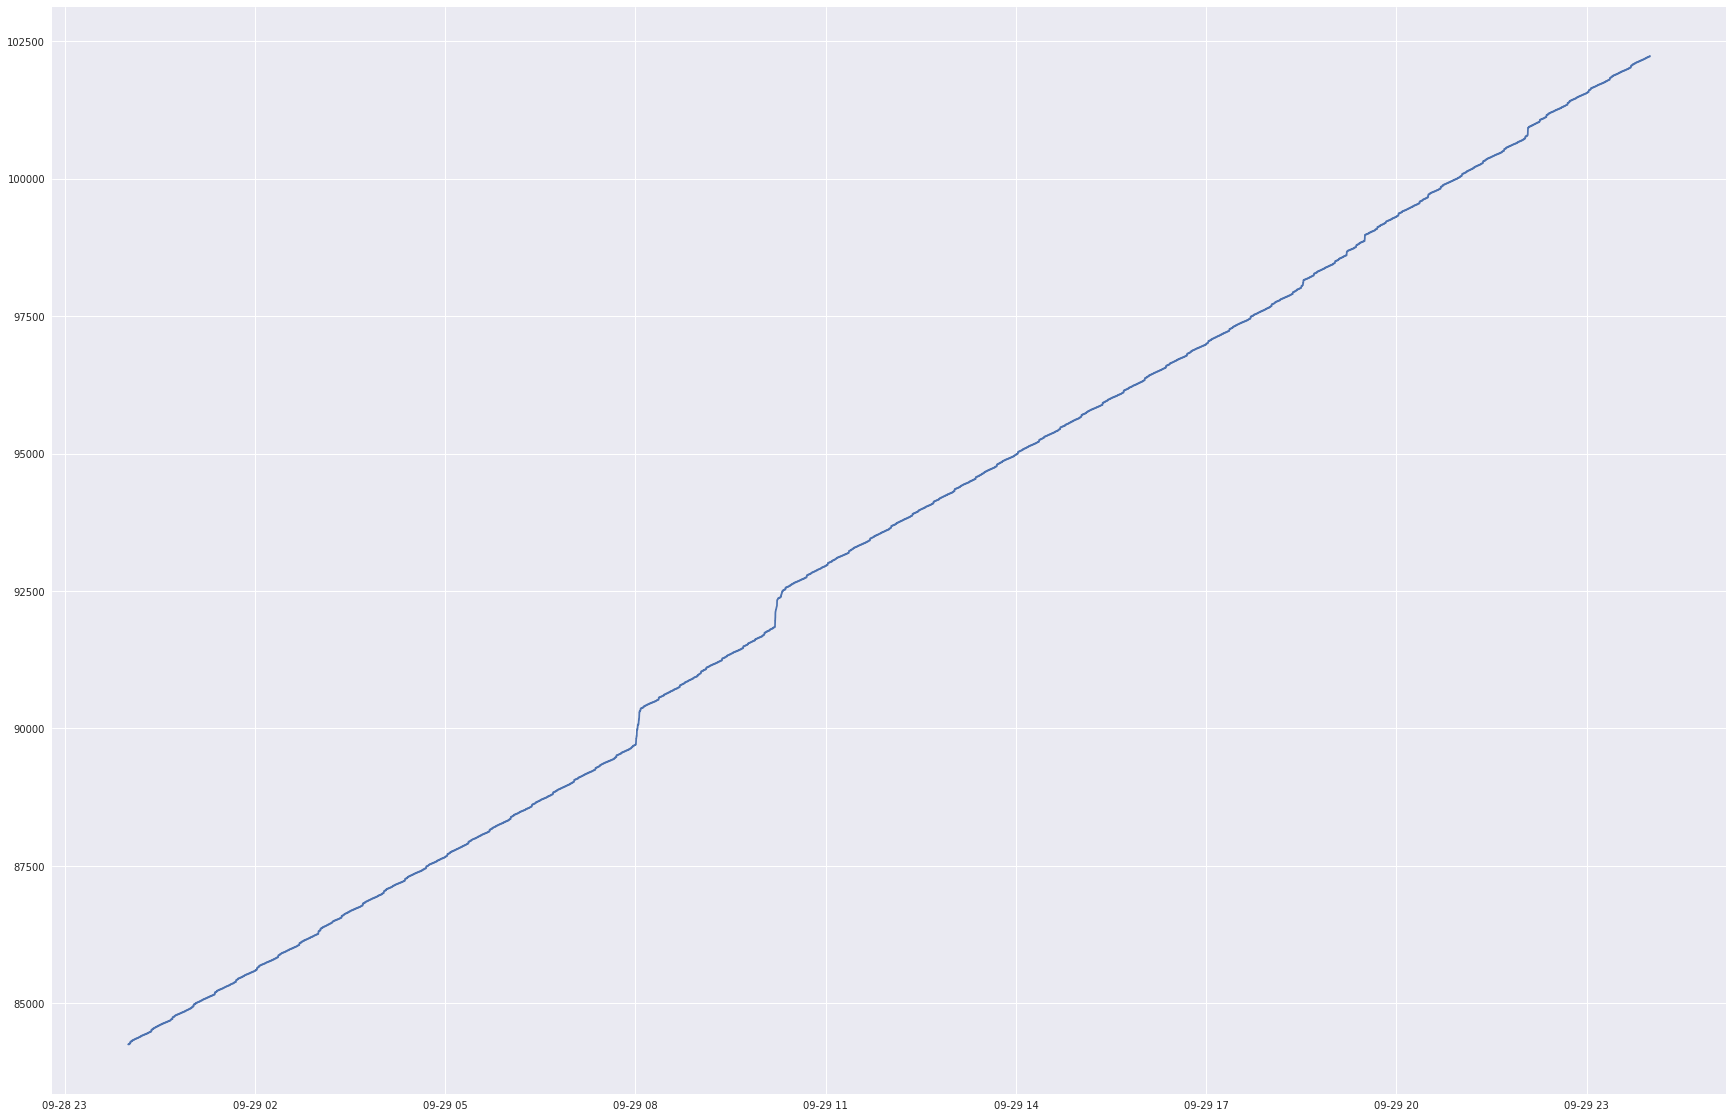

In [23]:
plt.figure(figsize=(30,20))
plt.plot(server_profile.server_profile['qvipnbdora04_general'].profile['2017-09-29'])

In [24]:
test = server_profile.server_profile['qvipnbdora04_general'].profile

In [25]:
test.loc[mask].shape

(102229, 1)

In [26]:
date_train[17]

'2017-10-18'

In [27]:
mask = (df_log.index >= date_train[0]) & (df_log.index <= date_train[17])
data = df_log.loc[mask]

In [28]:
data.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,61,62,63,64,65,66,67,68,69,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* session * for user * * *


In [29]:
# learning the distribution hope we do not have any
%autoreload 
distribution_init = sortedcontainers.SortedDict(sortedcontainers.SortedList())
for i in range(7):
    distribution_init[i]=sortedcontainers.SortedList([0,np.inf])
server_profile.verbose = False
server_profile.level_threshold = 1e-6
server_profile.distribution = distribution_init
server_profile.processus = True
start_date = data.index[0]
i=0
while start_date + dt.timedelta(seconds=server_profile.parameters[0,2]*60) < data.index[-1]:
    data_to_compute = data.loc[start_date:(start_date + dt.timedelta(seconds=server_profile.parameters[0,2]*60))]
    anomaly, max_spread, min_spread, d, date, threshold, quant = server_profile.process_distance(data_to_compute)
    start_date = start_date + dt.timedelta(minutes=1)
    i+=1

6
dict_keys([])


KeyError: 'Area_Difference'

In [142]:
server_profile.distribution[0].remove(np.inf)
server_profile.distribution[1].remove(np.inf)
server_profile.distribution[2].remove(np.inf)
server_profile.distribution[3].remove(np.inf)
server_profile.distribution[4].remove(np.inf)
server_profile.distribution[5].remove(np.inf)

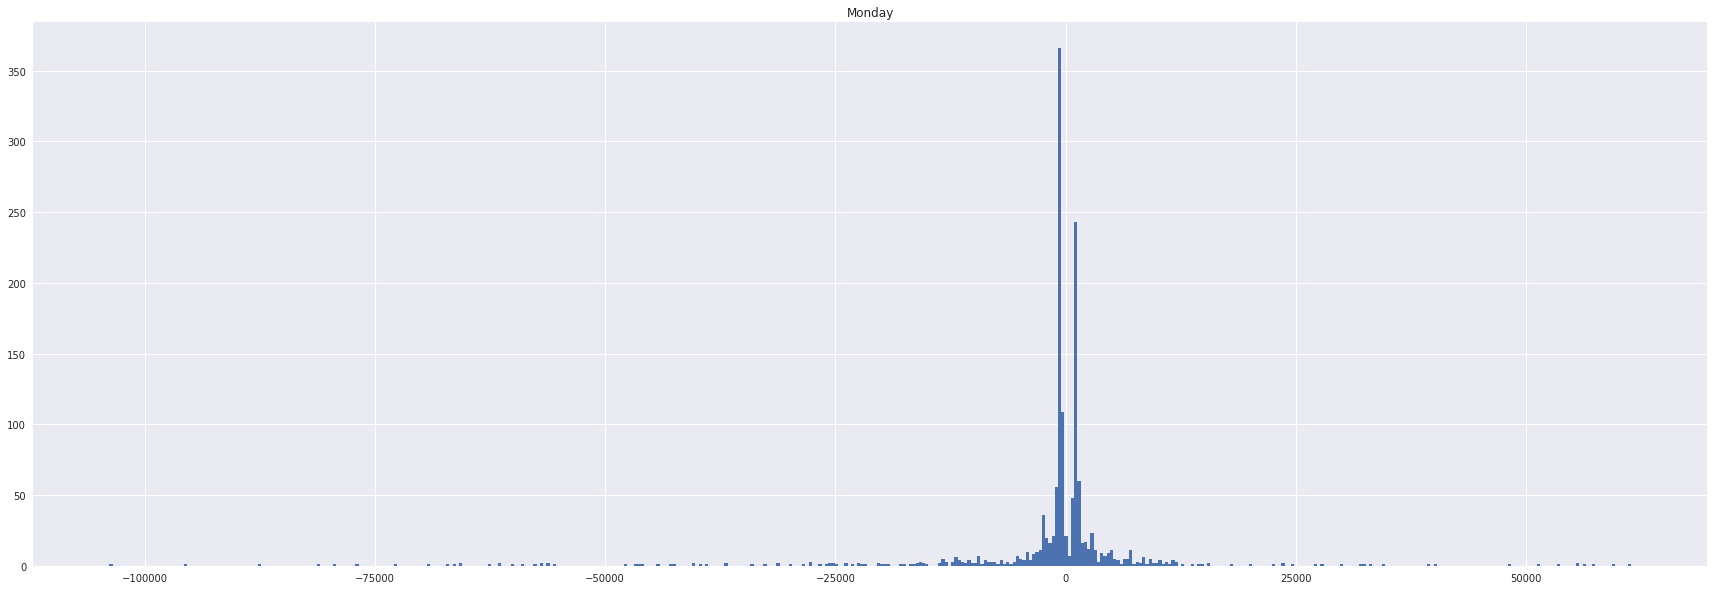

In [143]:
# distribution jour 
import calendar
plt.figure(figsize=(30,10))
plt.hist(server_profile.distribution[0], bins = 'auto')
plt.title(calendar.day_name[0])
plt.legend()
plt.show()

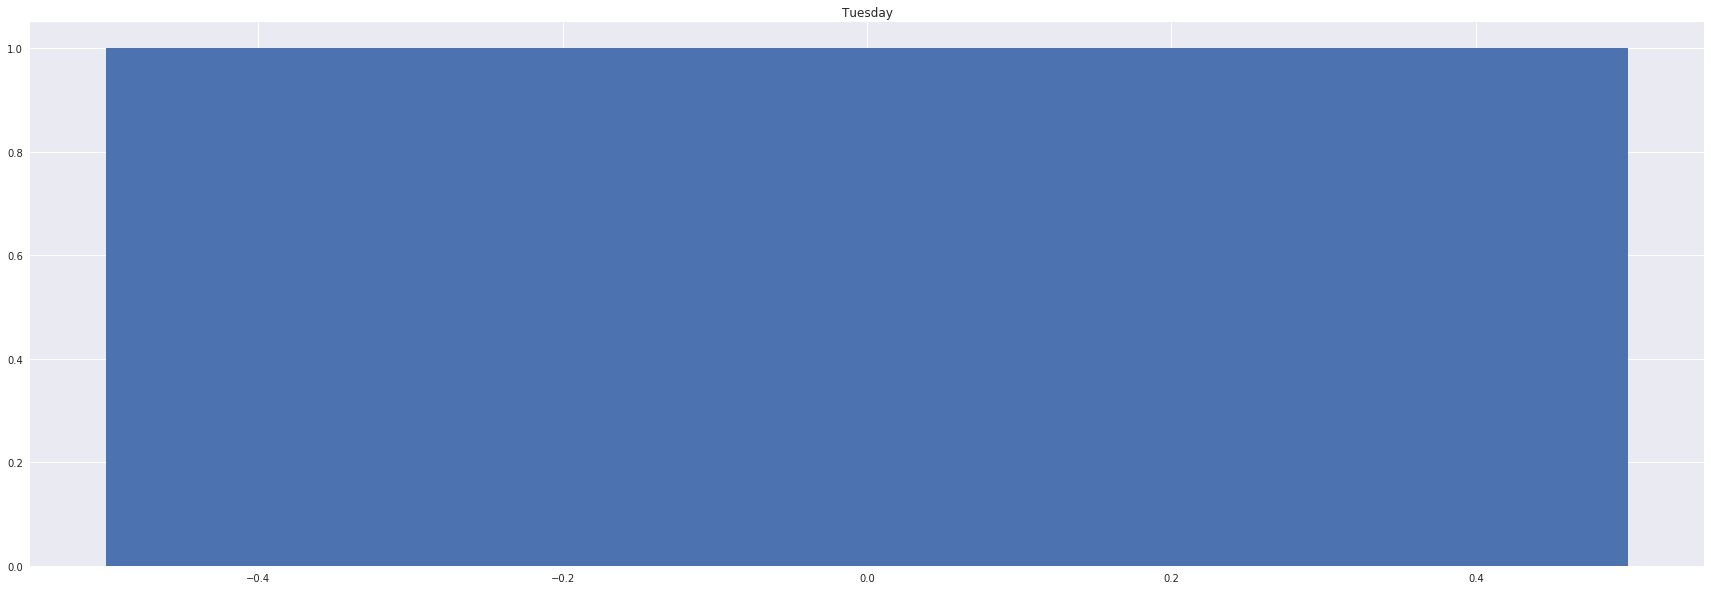

In [144]:
import calendar
plt.figure(figsize=(30,10))
plt.hist(server_profile.distribution[1], bins ='auto')
plt.title(calendar.day_name[1])
plt.legend()
plt.show()

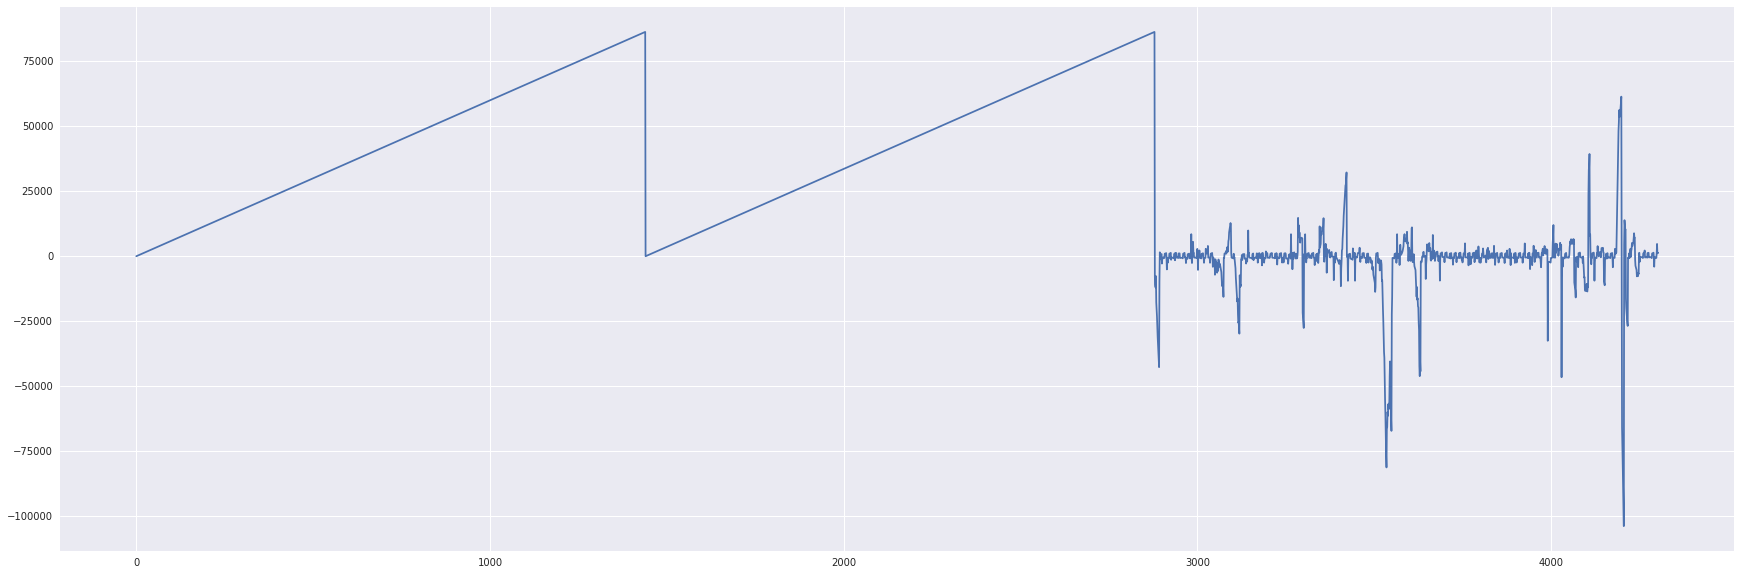

In [146]:
plt.figure(figsize=(30,10))
plt.plot(range(len(server_profile.measures[0]['Area_Difference'])),server_profile.measures[0]['Area_Difference'] )

In [125]:
data = df_log[date_train[1]]

In [127]:
data.index = pd.to_datetime(data.timestamp, format='%Y-%m-%d %H:%M:%S')
data_rs= data.drop(data.columns[1:len(data.columns) - 1], axis=1)
d_min = data[date_train[1]].resample('1S').count().cumsum()['timestamp'].values
d_min = pd.DataFrame(d_min, columns=['intensity'])

In [128]:
date_train[0]

'2017-10-01'

In [129]:
d_min.head()

,intensity
0,8
1,8
2,8
3,8
4,8


In [130]:
mask = (server_profile.server_profile['qvipnbdora04_general'].profile.index.weekday == 0) & (server_profile.server_profile['qvipnbdora04_general'].profile.index.hour <= 2) 
start_date = server_profile.server_profile['qvipnbdora04_general'].profile.loc[mask,'timestamp'].index[0]


In [131]:
server_profile.server_profile['qvipnbdora04_general'].profile.loc[start_date: start_date + dt.timedelta(seconds=3600*24),'timestamp'].values

array([16656., 16656., 16656., ..., 33500., 33500., 33500.])

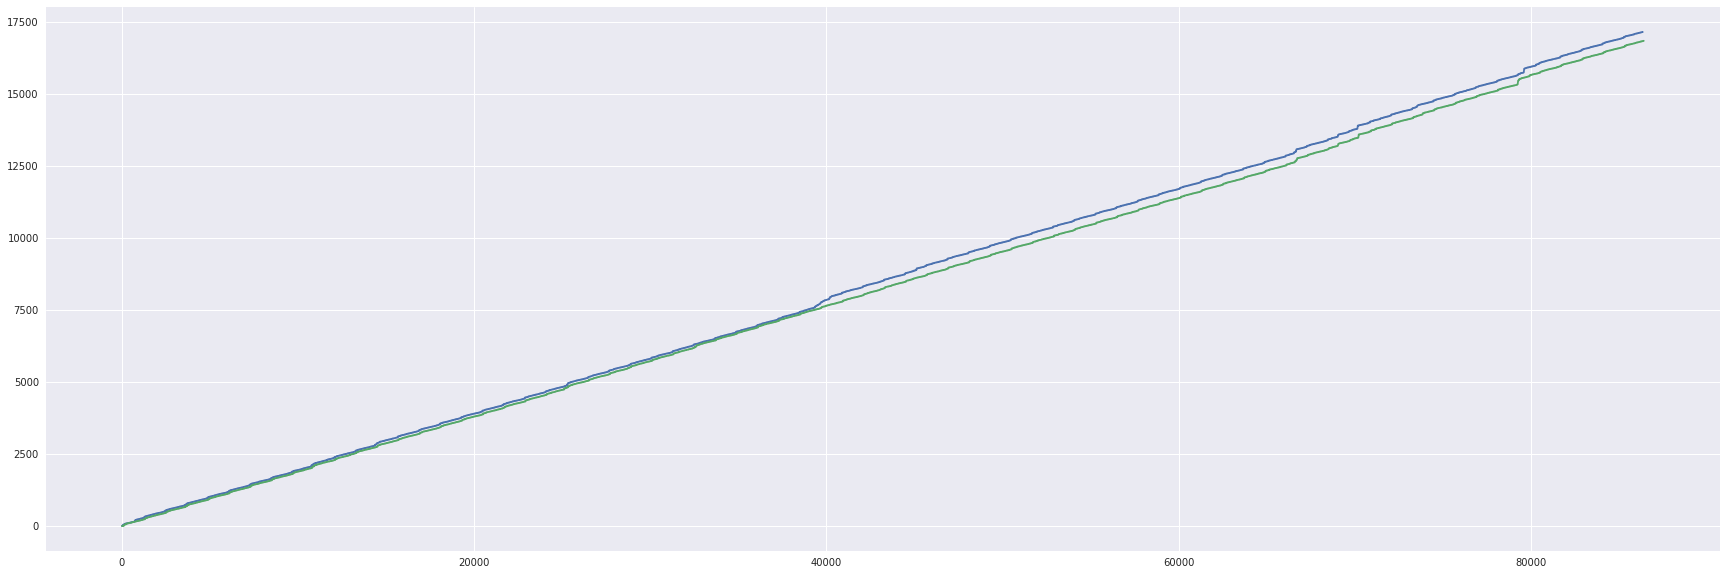

In [135]:
plt.figure(figsize=(30,10))
plt.plot(d_min.loc[:3600*24,'intensity'])
plt.plot(server_profile.server_profile['qvipnbdora04_general'].profile.loc[start_date: start_date + dt.timedelta(seconds=3600*24),'timestamp'].values
         -server_profile.server_profile['qvipnbdora04_general'].profile.loc[start_date-dt.timedelta(seconds=1), 'timestamp'])
plt.show()

In [128]:
date_profile

['2017-09-25',
 '2017-09-26',
 '2017-09-27',
 '2017-09-28',
 '2017-09-29',
 '2017-09-30',
 '2017-09-24']

In [129]:
date_train

['2017-10-01',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-07',
 '2017-10-08',
 '2017-10-09',
 '2017-10-10',
 '2017-10-11',
 '2017-10-12',
 '2017-10-13',
 '2017-10-14',
 '2017-10-15',
 '2017-10-16',
 '2017-10-17',
 '2017-10-18',
 '2017-10-19',
 '2017-10-20',
 '2017-10-21',
 '2017-10-22',
 '2017-10-23',
 '2017-10-24',
 '2017-10-25',
 '2017-10-26']

In [136]:
server_profile.distribution[6]

SortedList([-1621800.0, -1621800.0, -1621800.0, -1621800.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -432000.0, -432000.0, -432000.0, -432000.0, 0, 44592720.0, 44690976.0, 45658380.0, 45719580.0, 45976083.0, 46198320.0, 47387283.0, 48742680.0, 50023380.0, 50161980.0, 50568780.0, 51502105.0, 53465880.0, 54369480.0, 54912192.0, 55216476.0, 55350480.0, 56169480.0, 56999304.0, 58347480.0, 62067205.0, 63955380.0, 65138040.0, 71406522.0, 72302952.0, 73590822.0, inf])

In [ ]:
24*3600*6